# Resume Screening using KNN
Includes cleaning, categorization, job role prediction, and evaluation

In [26]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [27]:
from google.colab import files
import pandas as pd

# Prompt user to upload file
uploaded = files.upload()

# Load uploaded file (assuming it's named correctly)
df_raw = pd.read_csv(list(uploaded.keys())[0], encoding='ISO-8859-1')
df_raw.head()


Saving UpdatedResumeDataSet.csv to UpdatedResumeDataSet (2).csv


,Job_Category,Resume_Name,Resume
0,Data Science,resume1,Skills * Programming Languages: Python (pandas...
1,Data Science,resume2,Education Details \nMay 2013 to May 2017 B.E ...
2,Data Science,resume3,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,resume4,Skills â?¢ R â?¢ Python â?¢ SAP HANA â?¢ Table...
4,Data Science,resume5,"Education Details \n MCA YMCAUST, Faridabad..."


In [28]:
import re

def clean_resume(text):
    text = re.sub(r'http\S+\s*', ' ', text)      # Remove URLs
    text = re.sub(r'RT|cc', ' ', text)           # Remove RT and cc
    text = re.sub(r'#\S+', '', text)             # Remove hashtags
    text = re.sub(r'@\S+', ' ', text)            # Remove mentions
    text = re.sub(r'[^\w\s]', ' ', text)         # Remove punctuation/special chars
    text = re.sub(r'[^\x00-\x7f]', r' ', text)   # Remove non-ASCII characters
    text = re.sub(r'\s+', ' ', text)             # Replace multiple spaces with one
    return text.strip()


In [29]:
# Step 5: Apply Cleaning Function
df_raw['cleaned_resume'] = df_raw['Resume'].apply(clean_resume)
print("✅ Resume text cleaned.")
df_raw[['Resume', 'cleaned_resume']].head()

# Step 6: Save Cleaned Dataset
df_raw.to_csv('Cleaned_Resume_Data.csv', index=False)
print("✅ Cleaned dataset saved as 'Cleaned_Resume_Data.csv'")

✅ Resume text cleaned.
✅ Cleaned dataset saved as 'Cleaned_Resume_Data.csv'


In [30]:
import pandas as pd
import os

# Step 1: Check the current working directory
print(f"Current working directory: {os.getcwd()}")

# Step 2: Define the correct file path
file_path = '/content/Cleaned_Resume_Data.csv'

# Step 3: Load the cleaned dataset
df = pd.read_csv(file_path)
print("Dataset loaded successfully!")

# Step 4: Clean up the 'Resume' and 'cleaned_resume' columns
# Remove unwanted characters like 'â?¢' and extra spaces
df['Resume'] = df['Resume'].str.replace(r'â?¢', '', regex=True).str.strip()
df['cleaned_resume'] = df['cleaned_resume'].str.replace(r'â?¢', '', regex=True).str.strip()

# Optional: Further cleanup (if needed)
# You can replace new line characters or fix other common issues
df['Resume'] = df['Resume'].str.replace(r'\n', ' ', regex=True)
df['cleaned_resume'] = df['cleaned_resume'].str.replace(r'\n', ' ', regex=True)

# Step 5: Display the cleaned data
print(df[['Job_Category', 'Resume_Name', 'Resume', 'cleaned_resume']].head())  # Display the first few rows of cleaned data


Current working directory: /content
Dataset loaded successfully!
   Job_Category Resume_Name  \
0  Data Science     resume1   
1  Data Science     resume2   
2  Data Science     resume3   
3  Data Science     resume4   
4  Data Science     resume5   

                                              Resume  \
0  Skills * Programming Languages: Python (pandas...   
1  Education Details  May 2013 to May 2017 B.E   ...   
2  Areas of Interest Deep Learning, Control Syste...   
3  Skills â? R â? Python â? SAP HANA â? Tableau â...   
4  Education Details   MCA   YMCAUST,  Faridabad,...   

                                      cleaned_resume  
0  Skills Programming Languages Python pandas num...  
1  Education Details May 2013 to May 2017 B E UIT...  
2  Areas of Interest Deep Learning Control System...  
3  Skills R Python SAP HANA Tableau SAP HANA SQL ...  
4  Education Details MCA YMCAUST Faridabad Haryan...  


In [31]:
from sklearn.preprocessing import LabelEncoder

# Step 6: Encode Job Categories
le = LabelEncoder()


# Use the correct column name (e.g., 'Job_Category')
df['Category_encoded'] = le.fit_transform(df['Job_Category'])


# Display the first few rows to check if encoding is correct
print(df[['Job_Category', 'Category_encoded']].head())


   Job_Category  Category_encoded
0  Data Science                 6
1  Data Science                 6
2  Data Science                 6
3  Data Science                 6
4  Data Science                 6


<ipython-input-32-eafcbfb89f6a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Job_Category', data=df, order=df['Job_Category'].value_counts().index,


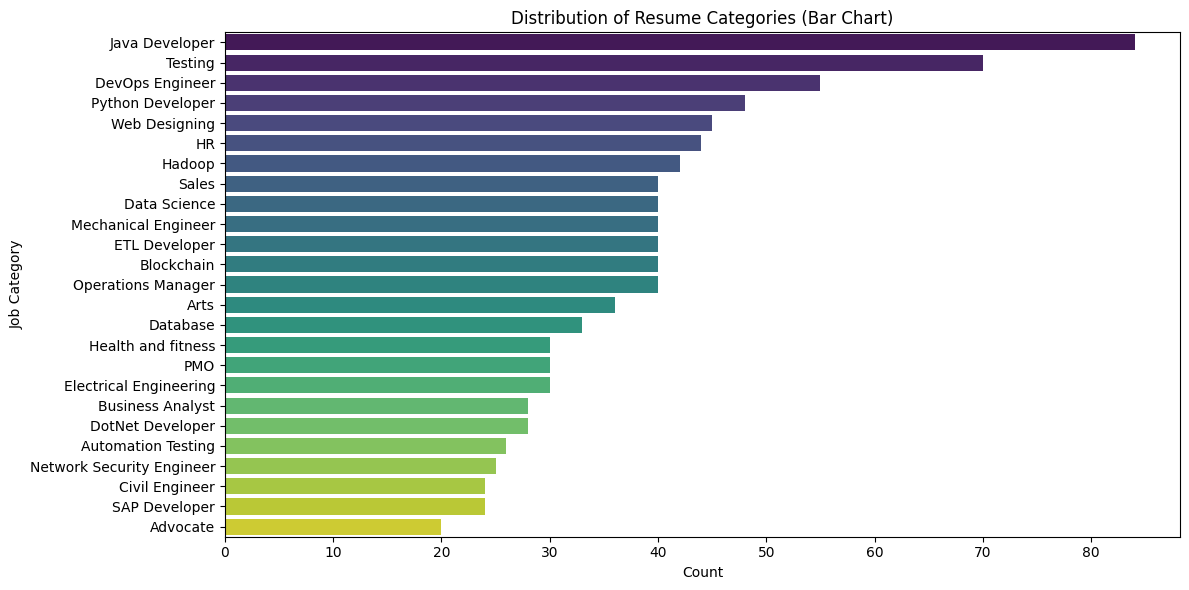

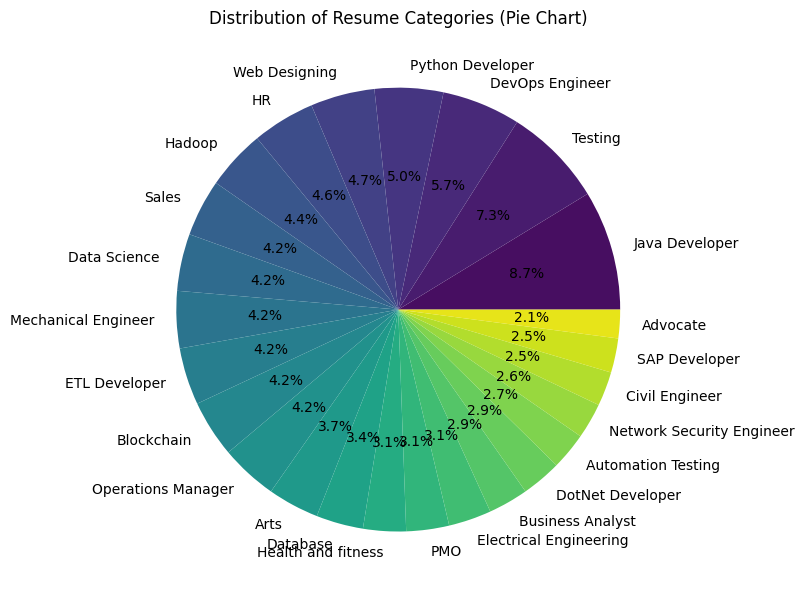

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size for the bar chart
plt.figure(figsize=(12, 6))

# Bar chart for Job Category Distribution with 'viridis' color palette
sns.countplot(y='Job_Category', data=df, order=df['Job_Category'].value_counts().index,
              palette='viridis', hue=None)  # Explicitly setting hue=None
plt.title('Distribution of Resume Categories (Bar Chart)')
plt.xlabel('Count')
plt.ylabel('Job Category')
plt.tight_layout()
plt.show()

# Pie chart for Job Category Distribution
category_counts = df['Job_Category'].value_counts()

# Set the figure size for the pie chart
plt.figure(figsize=(8, 8))

# Plot pie chart with colors from the 'viridis' palette
category_counts.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('viridis', n_colors=len(category_counts)))
plt.title('Distribution of Resume Categories (Pie Chart)')
plt.ylabel('')  # Hide the y-label for better readability
plt.tight_layout()
plt.show()


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 8: TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english', max_features=1500)
X = tfidf.fit_transform(df['cleaned_resume'])
y = df['Category_encoded']

# You can check the shape of X to confirm the transformation
print("TF-IDF Matrix Shape:", X.shape)

# This will show the number of rows (documents) and features (terms) in the TF-IDF matrix


TF-IDF Matrix Shape: (962, 1500)


In [34]:
from sklearn.model_selection import train_test_split

# Split the TF-IDF features and labels into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

In [36]:
from sklearn.metrics import accuracy_score

# Predict on test data
y_pred = knn_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Model Accuracy: {accuracy:.2f}")


✅ Model Accuracy: 0.98


In [37]:
pip install PyMuPDF


In [38]:
import fitz  # PyMuPDF
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from google.colab import files


In [39]:
import pandas as pd
from google.colab import files

# Step 1: Upload CSV file
uploaded = files.upload()
csv_filename = next(iter(uploaded))  # get the uploaded filename

# Step 2: Load the CSV into a DataFrame
df = pd.read_csv(csv_filename)

# Step 3: Check column name (assume 'resume_text' column exists)
if 'resume_text' not in df.columns:
    raise ValueError("CSV must contain a 'resume_text' column with resume contents.")

# Step 4: Predict job category for each resume
def predict_job_category_for_dataframe(df, tfidf, knn_model, le):
    # Transform all resume texts to TF-IDF vectors
    resume_tfidf = tfidf.transform(df['resume_text'])

    # Predict job categories
    predicted_indices = knn_model.predict(resume_tfidf)
    predicted_labels = le.inverse_transform(predicted_indices)

    # Add predictions to the DataFrame
    df['predicted_job_category'] = predicted_labels
    return df

# Step 5: Run predictions and show results
df_with_predictions = predict_job_category_for_dataframe(df, tfidf, knn_model, le)

# Display top results
print(df_with_predictions[['name', 'predicted_job_category']].head())

# Optional: Save predictions to new CSV
df_with_predictions.to_csv("Resume_Predictions1.csv", index=False)
print("Predictions saved to Resume_Predictions1.csv")


Saving sample_resume_dataset_50.csv to sample_resume_dataset_50 (2).csv
       name predicted_job_category
0  Resume_1       Python Developer
1  Resume_2           Data Science
2  Resume_3                     HR
3  Resume_4                   Arts
4  Resume_5       Python Developer
Predictions saved to Resume_Predictions1.csv


In [40]:
!pip install filepicker


In [41]:
import fitz  # PyMuPDF
from google.colab import files

# Function to extract text from PDF
def extract_text_from_uploaded_pdf(file_bytes):
    with fitz.open(stream=file_bytes, filetype="pdf") as doc:
        text = ""
        for page in doc:
            text += page.get_text()
    return text

# Upload multiple PDF files
uploaded = files.upload()

# Process each uploaded PDF and extract text
all_resumes_text = {}

for pdf_filename, file_bytes in uploaded.items():
    resume_text = extract_text_from_uploaded_pdf(file_bytes)
    all_resumes_text[pdf_filename] = resume_text
    print(f"Extracted text from {pdf_filename}:\n", resume_text[:500])  # Preview of the extracted text

# Now, `all_resumes_text` contains the text extracted from each resume PDF
# You can use it for further processing, predictions, etc.


Saving Resume_1.pdf to Resume_1 (1).pdf
Saving Resume_2.pdf to Resume_2 (1).pdf
Saving Resume_3.pdf to Resume_3 (1).pdf
Saving Resume_4.pdf to Resume_4 (1).pdf
Saving Resume_5.pdf to Resume_5 (1).pdf
Extracted text from Resume_1 (1).pdf:
 Resume 1
1. John Doe (Software Developer)
Contact Information:
Email: john.doe@email.com
Phone: (123) 456-7890
LinkedIn: linkedin.com/in/johndoe
Summary:
Highly skilled software developer with 5+ years of experience in developing web applications.
Expertise in Python, Django, and RESTful APIs.
Skills:
Python, Django, JavaScript, React
RESTful APIs, Flask, Git, Docker
Experience:
Software Developer
TechCorp | January 2018 - Present
Developed and maintained web applications using Django and React.
Extracted text from Resume_2 (1).pdf:
 Resume 2
2. Mary Johnson (Data Scientist)
Contact Information:
Email: mary.johnson@email.com
Phone: (987) 654-3210
LinkedIn: linkedin.com/in/maryjohnson
Summary:
Experienced data scientist with a strong background in mach

In [42]:
import pandas as pd

# Assuming tfidf, knn_model, and le have been trained earlier in the notebook

def predict_job_category_for_all_resumes(all_resumes_text, tfidf, knn_model, le):
    predictions = {}

    # Iterate over all uploaded resumes and predict the job category
    for pdf_filename, resume_text in all_resumes_text.items():
        # Transform the resume text using the trained TF-IDF vectorizer
        resume_tfidf = tfidf.transform([resume_text])

        # Predict the job category using the KNN model
        job_category_index = knn_model.predict(resume_tfidf)[0]

        # Decode the predicted label back to the job category
        job_category = le.inverse_transform([job_category_index])[0]

        # Store the prediction in the dictionary
        predictions[pdf_filename] = job_category

    return predictions

# Example input: all_resumes_text contains resumes' text indexed by their filenames (e.g., .pdf or .txt)
# Replace with actual resume text data
# all_resumes_text = {'resume1.pdf': 'Some text of the first resume', 'resume2.pdf': 'Some text of the second resume'}

# Predict job categories for all uploaded resumes
predictions = predict_job_category_for_all_resumes(all_resumes_text, tfidf, knn_model, le)

# Print the predictions for each resume
for pdf_filename, job_category in predictions.items():
    print(f"Predicted job role for {pdf_filename}: {job_category}")

# Convert the predictions dictionary to a DataFrame
predictions_df = pd.DataFrame(list(predictions.items()), columns=['Resume Filename', 'Predicted Job Category'])

# Save the predictions to a CSV file
predictions_df.to_csv('resume_predictions2.csv', index=False)

print("Predictions saved to resume_predictions2.csv")


Predicted job role for Resume_1 (1).pdf: Python Developer
Predicted job role for Resume_2 (1).pdf: Data Science
Predicted job role for Resume_3 (1).pdf: HR
Predicted job role for Resume_4 (1).pdf: Blockchain
Predicted job role for Resume_5 (1).pdf: PMO
Predictions saved to resume_predictions2.csv


----- Evaluation Metrics (Test Set) -----
Accuracy      : 97.93%
Precision     : 98.09%
Recall        : 97.93%
F1-Score      : 97.90%

----- Classification Report -----
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         9
           6       0.75      0.60      0.67         5
           7       1.00      0.88      0.93         8
           8       1.00      0.93      0.96        14
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00         4
          14       1

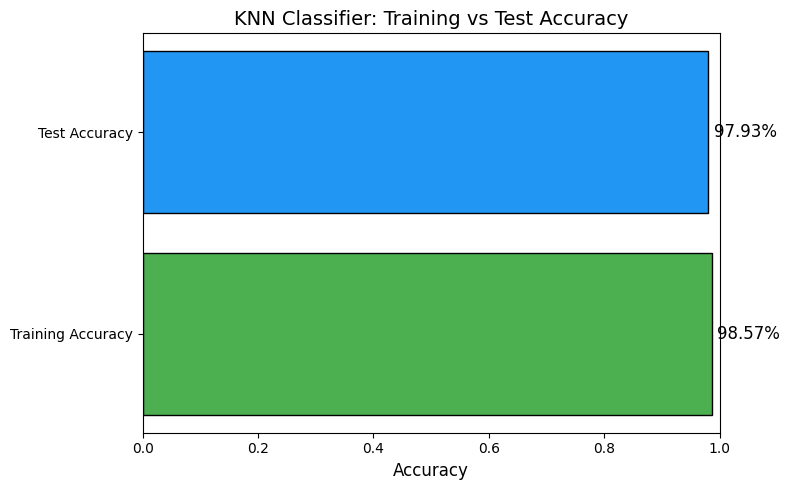

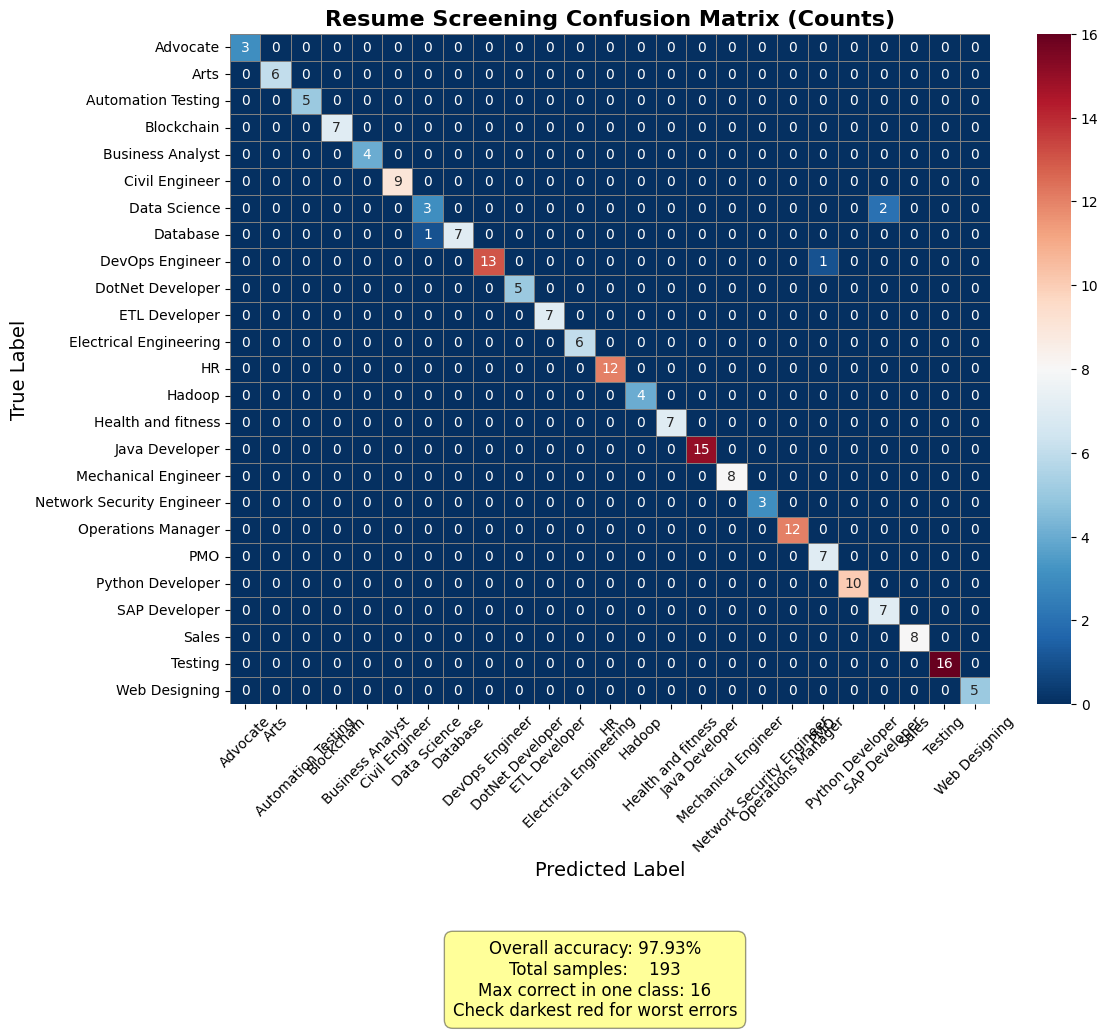


----- Uploaded Resume Predictions -----
Resume_1 (1).pdf: Python Developer
Resume_2 (1).pdf: Data Science
Resume_3 (1).pdf: HR
Resume_4 (1).pdf: Blockchain
Resume_5 (1).pdf: PMO


In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)

# 1. Split TF-IDF data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 2. Fit the KNN model on training data
knn_model.fit(X_train, y_train)

# 3. Predict on both train and test sets
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)

# 4. Calculate metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_test_pred, average='weighted', zero_division=0)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy

# 5. Print metrics
print("----- Evaluation Metrics (Test Set) -----")
print(f"Accuracy      : {accuracy * 100:.2f}%")
print(f"Precision     : {precision * 100:.2f}%")
print(f"Recall        : {recall * 100:.2f}%")
print(f"F1-Score      : {f1 * 100:.2f}%\n")

print("----- Classification Report -----")
print(classification_report(y_test, y_test_pred, zero_division=0))

print("----- Accuracy Comparison -----")
print(f"Training Accuracy : {train_accuracy * 100:.2f}%")
print(f"Test Accuracy     : {test_accuracy * 100:.2f}%")

# 6. Bar chart for train vs test accuracy
labels = ['Training Accuracy', 'Test Accuracy']
accuracy_values = [train_accuracy, test_accuracy]
colors = ['#4CAF50', '#2196F3']

plt.figure(figsize=(8, 5))
bars = plt.barh(labels, accuracy_values, color=colors, edgecolor='black')
plt.xlim([0, 1])
plt.title('KNN Classifier: Training vs Test Accuracy', fontsize=14)
plt.xlabel('Accuracy', fontsize=12)
for bar in bars:
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
             f"{bar.get_width() * 100:.2f}%", va='center', fontsize=12)
plt.tight_layout()
plt.show()

# 7. Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='RdBu_r',
    xticklabels=le.inverse_transform(np.unique(y_test)),
    yticklabels=le.inverse_transform(np.unique(y_test)),
    linewidths=0.5,
    linecolor='gray',
    ax=ax
)
ax.set_title('Resume Screening Confusion Matrix (Counts)', fontsize=16, fontweight='bold')
ax.set_xlabel('Predicted Label', fontsize=14)
ax.set_ylabel('True Label', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

msg = (
    f"Overall accuracy: {test_accuracy:.2%}\n"
    f"Total samples:    {len(y_test)}\n"
    f"Max correct in one class: {cm.diagonal().max()}\n"
    f"Check darkest red for worst errors"
)
fig.text(
    0.5, -0.05,
    msg,
    fontsize=12,
    verticalalignment='top',
    horizontalalignment='center',
    bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.4, edgecolor='black')
)
plt.tight_layout()
plt.show()

# 8. Predict job categories for uploaded resumes
def predict_job_category_for_all_resumes(resume_texts, tfidf, knn_model, le):
    predictions = {}
    for filename, text in resume_texts.items():
        tfidf_vector = tfidf.transform([text])
        pred_index = knn_model.predict(tfidf_vector)[0]
        pred_label = le.inverse_transform([pred_index])[0]
        predictions[filename] = pred_label
    return predictions

# Example: assuming all_resumes_text is defined like this
# all_resumes_text = {'resume1.pdf': "Python, Machine Learning, TensorFlow", ...}

uploaded_preds = predict_job_category_for_all_resumes(all_resumes_text, tfidf, knn_model, le)

print("\n----- Uploaded Resume Predictions -----")
for file, pred in uploaded_preds.items():
    print(f"{file}: {pred}")


Dropdown(description='Job Role:', layout=Layout(width='300px'), options=('Advocate', 'Arts', 'Automation Testi…

Button(button_style='success', description='Save Shortlisted Resumes', layout=Layout(height='40px', width='250…

🔍 Selected Job Role: Java Developer
✅ Shortlisted Resumes: 84
❌ Rejected Resumes: 878


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


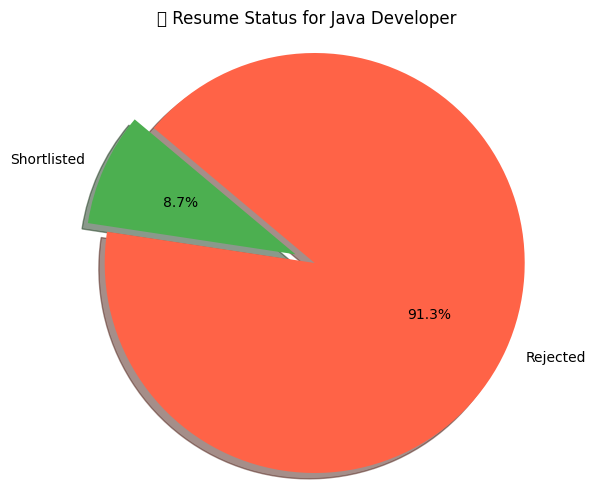

✅ Shortlisted resumes saved to 'Shortlisted_Resumes_Java_Developer.csv' with job role names.


In [21]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load the dataset
resumeDataSet = pd.read_csv('/content/Cleaned_Resume_Data.csv', encoding='ISO-8859-1')

# Label Encode Job_Category
le = LabelEncoder()
resumeDataSet['Job_Category'] = le.fit_transform(resumeDataSet['Job_Category'])

# Function to filter resumes based on selected job role
def filter_resumes_by_job_role(resume_data, selected_job_role):
    encoded_job_role = le.transform([selected_job_role])[0]
    shortlisted_resumes = resume_data[resume_data['Job_Category'] == encoded_job_role]
    rejected_resumes = resume_data[resume_data['Job_Category'] != encoded_job_role]
    return shortlisted_resumes.shape[0], rejected_resumes.shape[0]

# Function to get shortlisted resumes
def get_shortlisted_resumes(resume_data, selected_job_role):
    encoded_job_role = le.transform([selected_job_role])[0]
    return resume_data[resume_data['Job_Category'] == encoded_job_role].copy()

# Function to save shortlisted resumes with decoded Job Category
def save_to_csv(b):
    selected_job_role = job_role_dropdown.value
    shortlisted = get_shortlisted_resumes(resumeDataSet, selected_job_role)

    # Decode Job_Category and safely assign with correct dtype
    decoded_categories = le.inverse_transform(shortlisted['Job_Category'])
    shortlisted = shortlisted.astype({'Job_Category': 'object'})
    shortlisted['Job_Category'] = decoded_categories

    # Save to CSV
    filename = f"Shortlisted_Resumes_{selected_job_role.replace(' ', '_')}.csv"
    shortlisted.to_csv(filename, index=False)
    print(f"✅ Shortlisted resumes saved to '{filename}' with job role names.")

# Function to update counts and show pie chart
def update_counts(change):
    selected_job_role = job_role_dropdown.value
    print(f"🔍 Selected Job Role: {selected_job_role}")

    shortlisted_count, rejected_count = filter_resumes_by_job_role(resumeDataSet, selected_job_role)
    print(f"✅ Shortlisted Resumes: {shortlisted_count}")
    print(f"❌ Rejected Resumes: {rejected_count}")

    # Pie chart
    labels = ['Shortlisted', 'Rejected']
    sizes = [shortlisted_count, rejected_count]
    colors = ['#4CAF50', '#FF6347']
    explode = (0.1, 0)

    plt.figure(figsize=(6, 6))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.title(f"📊 Resume Status for {selected_job_role}")
    plt.axis('equal')
    plt.show()

# Dropdown for job role selection
job_roles = le.inverse_transform(resumeDataSet['Job_Category'].unique())
job_role_dropdown = widgets.Dropdown(
    options=sorted(job_roles),
    description='Job Role:',
    disabled=False,
    layout=widgets.Layout(width='300px')
)
job_role_dropdown.observe(update_counts, names='value')

# Save button
save_button = widgets.Button(
    description="Save Shortlisted Resumes",
    button_style='success',
    layout=widgets.Layout(width='250px', height='40px'),
    style={'font_weight': 'bold', 'font_size': '16px'}
)
save_button.on_click(save_to_csv)

# Display UI
display(job_role_dropdown, save_button)


Dropdown(description='Job Role: ', layout=Layout(width='400px'), options=('Data Science', 'HR', 'Advocate', 'J…

Button(button_style='info', description='Show Best Matches', layout=Layout(height='40px', width='250px'), styl…

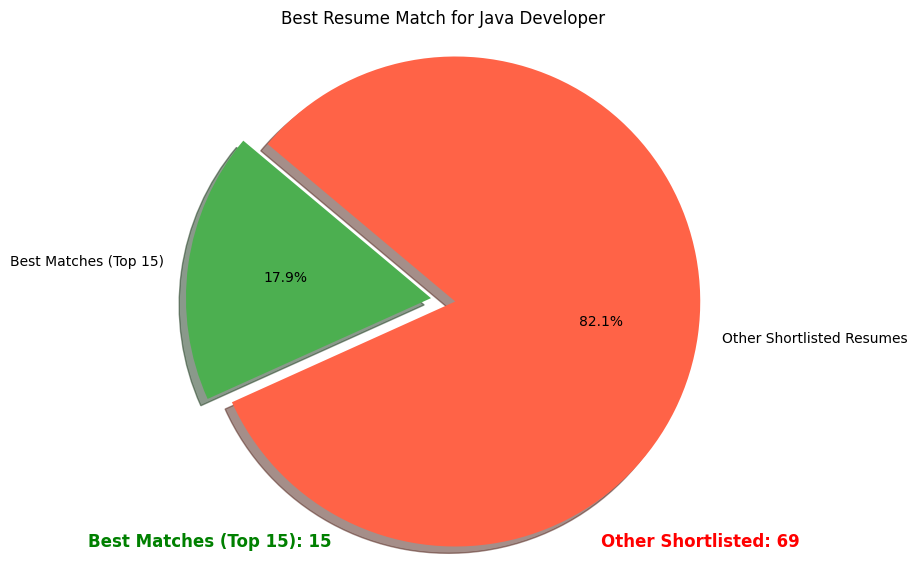

📄 Top Matching Resumes:


,Resume_Name,Job_Category,MatchScore
1,resume321,Java Developer,4
10,resume330,Java Developer,4
6,resume326,Java Developer,4
7,resume327,Java Developer,4
15,resume335,Java Developer,4
57,resume377,Java Developer,4
62,resume382,Java Developer,4
63,resume383,Java Developer,4
66,resume386,Java Developer,4
77,resume397,Java Developer,4


✅ Best matching resumes saved to 'Best_Matching_Resumes_Java_Developer.csv'.


In [22]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Define required skills for each job role
job_role_skills = {
    'Data Science': ['python', 'machine learning', 'statistics', 'pandas', 'numpy', 'matplotlib', 'data analysis'],
    'HR': ['recruitment', 'payroll', 'employee engagement', 'communication', 'labor laws', 'onboarding'],
    'Advocate': ['legal', 'drafting', 'contracts', 'litigation', 'court', 'evidence'],
    'Java Developer': ['java', 'spring', 'hibernate', 'microservices', 'j2ee'],
    'Testing': ['selenium', 'manual testing', 'automation', 'test cases', 'bug tracking'],
    'Operations Manager': ['supply chain', 'logistics', 'inventory', 'operations', 'process improvement'],
    'Sales': ['lead generation', 'negotiation', 'crm', 'targets', 'client handling'],
    'Digital Marketing': ['seo', 'sem', 'social media', 'campaigns', 'analytics'],
    'Blockchain': ['blockchain', 'ethereum', 'solidity', 'smart contracts', 'decentralized'],
    'Mechanical Engineer': ['cad', 'solidworks', 'thermodynamics', 'manufacturing'],
    'Python Developer': ['python', 'django', 'flask', 'api', 'pandas'],
    'Web Designing': ['html', 'css', 'javascript', 'photoshop', 'ui/ux'],
    'Automation Testing': ['selenium', 'pytest', 'automation', 'framework'],
    'Electrical Engineering': ['circuit', 'voltage', 'power', 'control systems'],
    'Health and Fitness': ['nutrition', 'workout', 'trainer', 'diet'],
    'SAP Developer': ['sap', 'abap', 'modules', 'sap hana'],
    'Business Analyst': ['requirement gathering', 'business process', 'stakeholder', 'documentation'],
    'Civil Engineer': ['autocad', 'site engineer', 'construction', 'structural'],
    'DevOps Engineer': ['jenkins', 'docker', 'kubernetes', 'ci/cd', 'linux'],
    'Database': ['sql', 'oracle', 'mysql', 'data modeling']
}

# Function to calculate match score (based on the number of skills that appear in the resume)
def calculate_match_score(resume_text, skills):
    resume_text = resume_text.lower()  # Convert the resume to lowercase to match case-insensitively
    match_count = sum(1 for skill in skills if re.search(r'\b' + re.escape(skill) + r'\b', resume_text))
    return match_count

# Function to analyze top 15 matches and plot
def analyze_best_matches(selected_job_role):
    file_name = f"Shortlisted_Resumes_{selected_job_role.replace(' ', '_')}.csv"
    df = pd.read_csv(file_name)

    skills_required = job_role_skills.get(selected_job_role, [])
    df['MatchScore'] = df['Resume'].apply(lambda x: calculate_match_score(str(x), skills_required))

    # Sort and select top 15
    top_matches = df.sort_values(by='MatchScore', ascending=False).head(15)

    # Calculate total shortlisted resumes
    total_shortlisted = df.shape[0]

    # Calculate the number of best matches (top 15)
    best_matches_count = top_matches.shape[0]

    # Calculate the number of other shortlisted resumes (excluding top 15)
    other_matches_count = total_shortlisted - best_matches_count

    # Plot pie chart with counts
    labels = ['Best Matches (Top 15)', 'Other Shortlisted Resumes']
    sizes = [best_matches_count, other_matches_count]
    colors = ['#4CAF50', '#FF6347']
    explode = (0.1, 0)  # explode the first slice (Best Matches)

    plt.figure(figsize=(7, 7))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.title(f"Best Resume Match for {selected_job_role}")
    plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.

    # Add counts on the pie chart
    plt.text(-1, -1, f"Best Matches (Top 15): {best_matches_count}", horizontalalignment='center', fontsize=12, color='green', fontweight='bold')
    plt.text(1, -1, f"Other Shortlisted: {other_matches_count}", horizontalalignment='center', fontsize=12, color='red', fontweight='bold')

    plt.show()

    # Display the top 15 matching resumes
    print("📄 Top Matching Resumes:")
    display(top_matches[['Resume_Name', 'Job_Category', 'MatchScore']])

    # Save the best matching resumes to a CSV
    best_matches_file = f"Best_Matching_Resumes_{selected_job_role.replace(' ', '_')}.csv"
    top_matches.to_csv(best_matches_file, index=False)
    print(f"✅ Best matching resumes saved to '{best_matches_file}'.")

# Job role dropdown (if not already defined)
job_role_dropdown = widgets.Dropdown(
    options=list(job_role_skills.keys()),
    description='Job Role: ',
    style={'description_width': '100px'},
    layout=widgets.Layout(width='400px')
)

# Button to run match analysis
match_button = widgets.Button(
    description="Show Best Matches",
    button_style='info',
    layout=widgets.Layout(width='250px', height='40px'),
    style={'font_weight': 'bold', 'font_size': '16px'}
)

def run_match_analysis(b):
    selected_job_role = job_role_dropdown.value
    analyze_best_matches(selected_job_role)

match_button.on_click(run_match_analysis)

# Display UI
display(job_role_dropdown)
display(match_button)
